# Worksheet 1 - Scientific Visualisation MVE080/MMG640
## Basics in Python, Jupyter, plotnine and how to visualize amounts

Name of all the group members: ___

This is the first worksheet in the course *Scientific Visualisation*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualisations using plotnine. Once you have finished all the tasks, export this document as an HTML file and upload it in Canvas. 

The goal of these homeworks is to learn how to improve your skills in visualising your science. You solve the homeworks in groups, however annotate all the code (even the theoretical parts) with who solved each question. **Eventhough the homework is submitted as a group you will be *individually* evaluated**. Motivate your choice of graph, legend, colourmap etc below your graph in a separate cell. 

Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. 

Throughout the assignment you shall use a Python workflow.
If you are completely new to Python, take a look at [this page](pythonbasics.org).
Python can do essentially all that MATLAB can, plus more. 
In this course we shall use Python in different contexts, starting with the [Jupyter Notebook interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html). 

Matrices and arrays are handled through the NumPy module. [Learn here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) how NumPy is different from MATLAB.

The below loads the packages required for this homework.

In [69]:
import numpy as np
import pandas as pd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 1-3 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1
Describe the visualisation concept _scales_. 

### Answer 1.1
Scales map data values to a specific aesthetic formula, for visual clarity. 

### Question 1.2
In Figures 2.3 and 2.4, the same data is visualised in two different ways. Discuss the pros and cons of the two approaches. Which one do you prefer and why?

### Answer 1.2
Pros and cons are prefixed by + and - respective to the attribute.

##### Figure 2.3
\+ One can easily follow the behaviour by looking at the graph

\+ It is easier to distinguish between two similar values in the Y-axis

\- The visualization cannot be scaled properly if the dataset expands to include more cities, it would lead to visual clutter

\- The plot lines already overlap as it is

##### Figure 2.4
\+ It's intuitive to look at because of the colours corresponding to appropriate

\+ It's very easy to scale to a larger data size

\- The data set needs to be ordered to be visually cohesive

\- The visuals are only approximations, it's difficult to discern near-values.

### Question 1.3
Describe situations when _nonlinear axes_ might be useful.
When should they not be used?

### Answer 1.3
They should be used if your data shows ratios and proportions

They shouldn't be used if we have negative data points or if the data points are close in value to eachother

### Question 1.4
In which situations could a _polar coordinate system_ be useful? 

### Answer 1.4
Periodic data is an appropriate situation to use a polar coordinate system to visualize it.


## Task 2 - Tidy data, ggplot and distributions

Several graphics libraries such as ggplot2 and plotnine are at their best when the provided data is tidy. However, data is often not provided in a tidy format, hence being able to transform non-tidy data into tidy data is a crucial skill. 

### Question 2.1 

In the lecture 1, I provided a small non-tidy dataset (code below).

In [70]:
data1 = pd.DataFrame({"Site" : ["Stockholm", "Gothenburg", "London"], 
                      "1999" : [13, 85, 77], 
                      "2000" : [21, 31, 15]})
data1

,Site,1999,2000
0,Stockholm,13,21
1,Gothenburg,85,31
2,London,77,15


Transform this small dataset into a tidy dataset. Print the table below (as I did above). 

*Hint* [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [71]:
# Write you answer here
tidy_data=data1.melt(id_vars=['Site'], var_name='Year', value_name='Value')
print(tidy_data)

         Site  Year  Value
0   Stockholm  1999     13
1  Gothenburg  1999     85
2      London  1999     77
3   Stockholm  2000     21
4  Gothenburg  2000     31
5      London  2000     15


### Question 2.2

Datasets are often bigger than above. I have made a subset of the weather data used in the lecture non-tidy (available on the webpage). 

Transform this dataset into a tidy dataset. Print the table below (as I did above)

In [72]:
# Write your answer here

weather_dataset = pd.read_csv("Homework1_resources/Weather_not_tidy.csv")

tidy_weather = weather_dataset.melt(id_vars=['month', 'day', 'hour_of_day'], value_vars=['Temp2009', 'Temp2010'], var_name='Year', value_name='Temperature')

tidy_weather['Year'] = tidy_weather['Year'].str.replace('Temp', '')
print(tidy_weather)

    month  day  hour_of_day  Year  Temperature
0     Jan    1           12  2009         -0.9
1     Jan    2           12  2009         -2.2
2     Jan    3           12  2009          4.2
3     Jan    4           12  2009         -4.7
4     Jan    5           12  2009         -7.8
..    ...  ...          ...   ...          ...
725   Dec   27           12  2010         -6.8
726   Dec   28           12  2010        -11.0
727   Dec   29           12  2010        -10.6
728   Dec   30           12  2010         -3.0
729   Dec   31           12  2010         -2.7

[730 rows x 5 columns]


## Distributions

For this part reading Chapter 7 and 9 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) helps.

## Question 3.1

The benefit with tidy data is that it is easy to work with. For this task, use the tidy weather dataset from above and choose three months and by **a density and histogram plot** visualise the differences in temperature between 2009 and 2010 for the chosen months in a readable manner. Make sure to print the visuals below. 

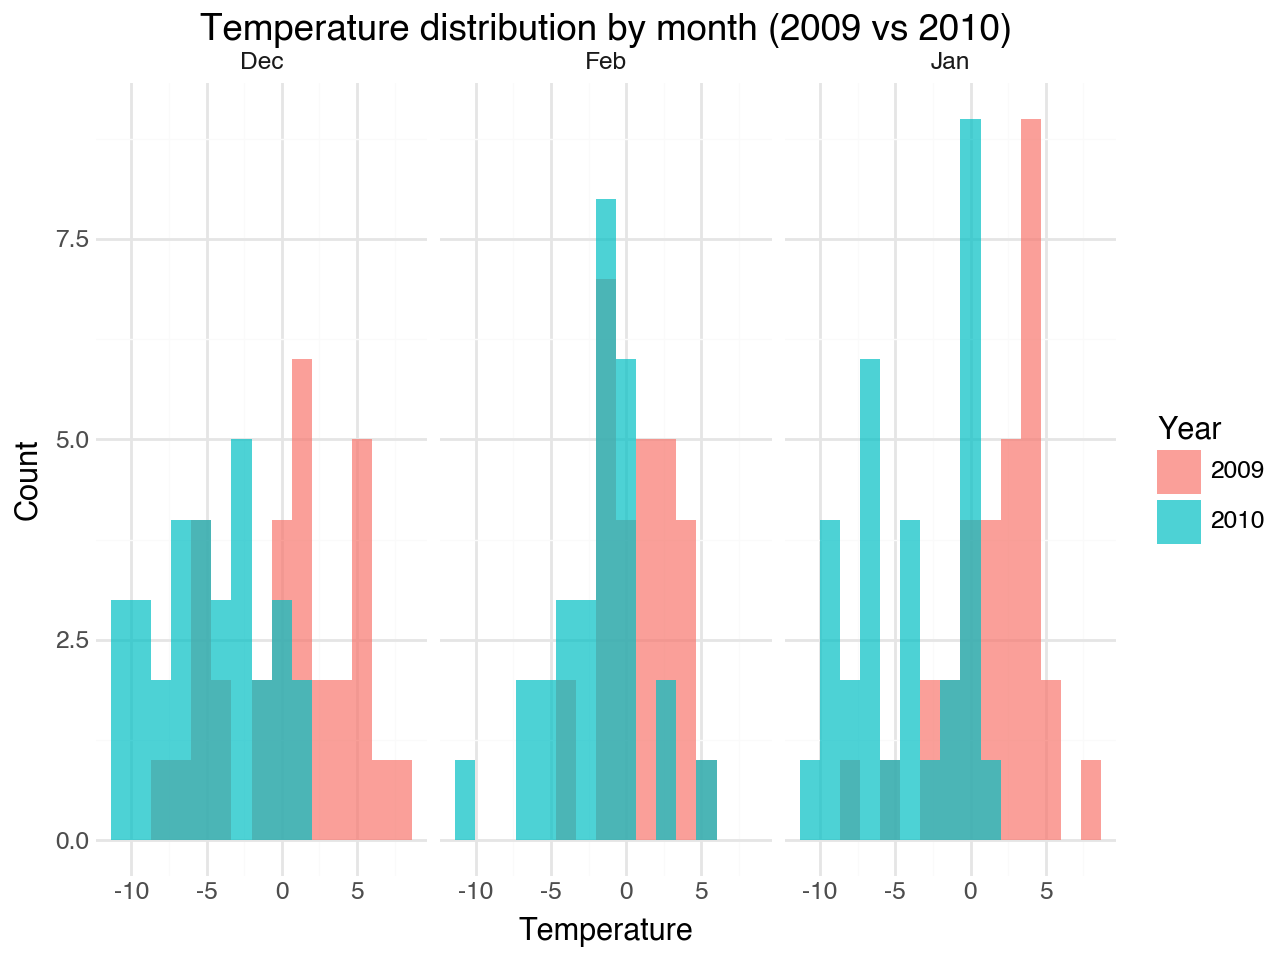

In [73]:
selected_months = ["Dec","Jan","Feb"]
filtered_weather = tidy_weather[tidy_weather['month'].isin(selected_months)]
(
ggplot(filtered_weather, aes(x="Temperature", fill="Year")) 
+ geom_histogram(position = "nudge", bins = 15, alpha = 0.7)
+ facet_wrap("~month")
+ labs(title = "Temperature distribution by month (2009 vs 2010)",
       x = "Temperature",
       y = "Count")
+ theme_minimal()
)

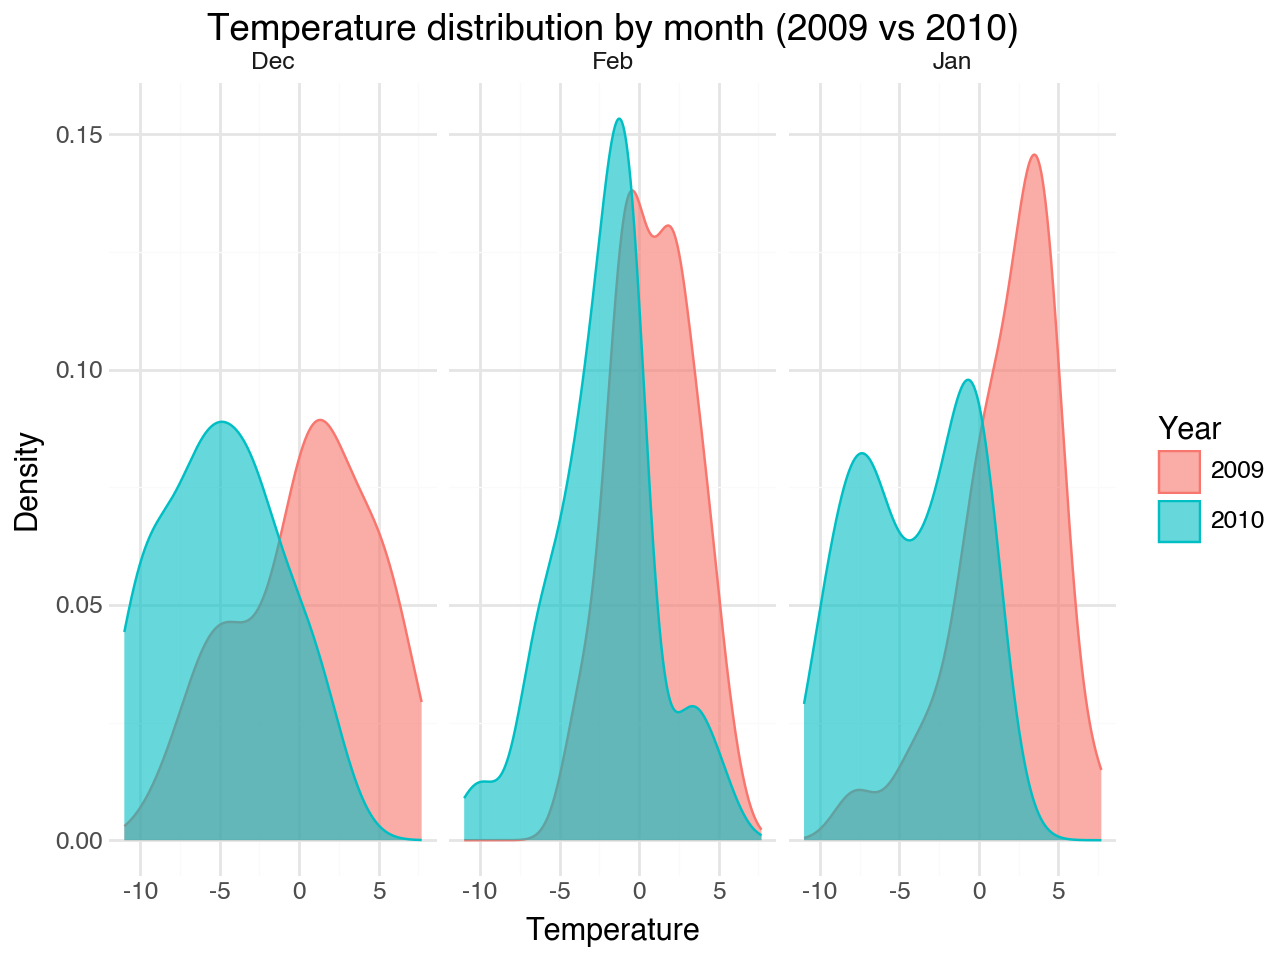

In [74]:
# Insert code here for density plot
(
ggplot(filtered_weather, aes(x="Temperature", color="Year", fill="Year"))
+ geom_density(alpha=0.6)
+ facet_wrap("~month")
+ labs(title = "Temperature distribution by month (2009 vs 2010)",
       x = "Temperature",
       y = "Density")
+ theme_minimal()
)

# Remember to print the visual 

**Provide a brief motivation for which plot (density and histogram) you find most readable and what you can conclude.**



The density distribution gets the idea of temperature trends across more clearly/instantly than the histograms because the curves reduce noise (contra binning choices). However, the histograms show raw count data, which is good if you are curious about absolute frequencies, rather than relative differences. We tried different bin counts on the histogram, and 15 seems like a good readable compromise, but the overlap still causes some readability issues (very clear example on the Feb plot).  

### Question 3.2

In Lecture 2, I used boxplots, error-bars, and violin plots to visualise fluctuations in winter temperature in Västerås. Now using the weather data above, plot the temperature per month (like in Fig. 9.8 [here](https://clauswilke.com/dataviz/boxplots-violins.html)) using error bars, boxplots and violin plots with data points. For each month, plot the temperature for 2009 and 2010 next to each other (see example on webpage). 

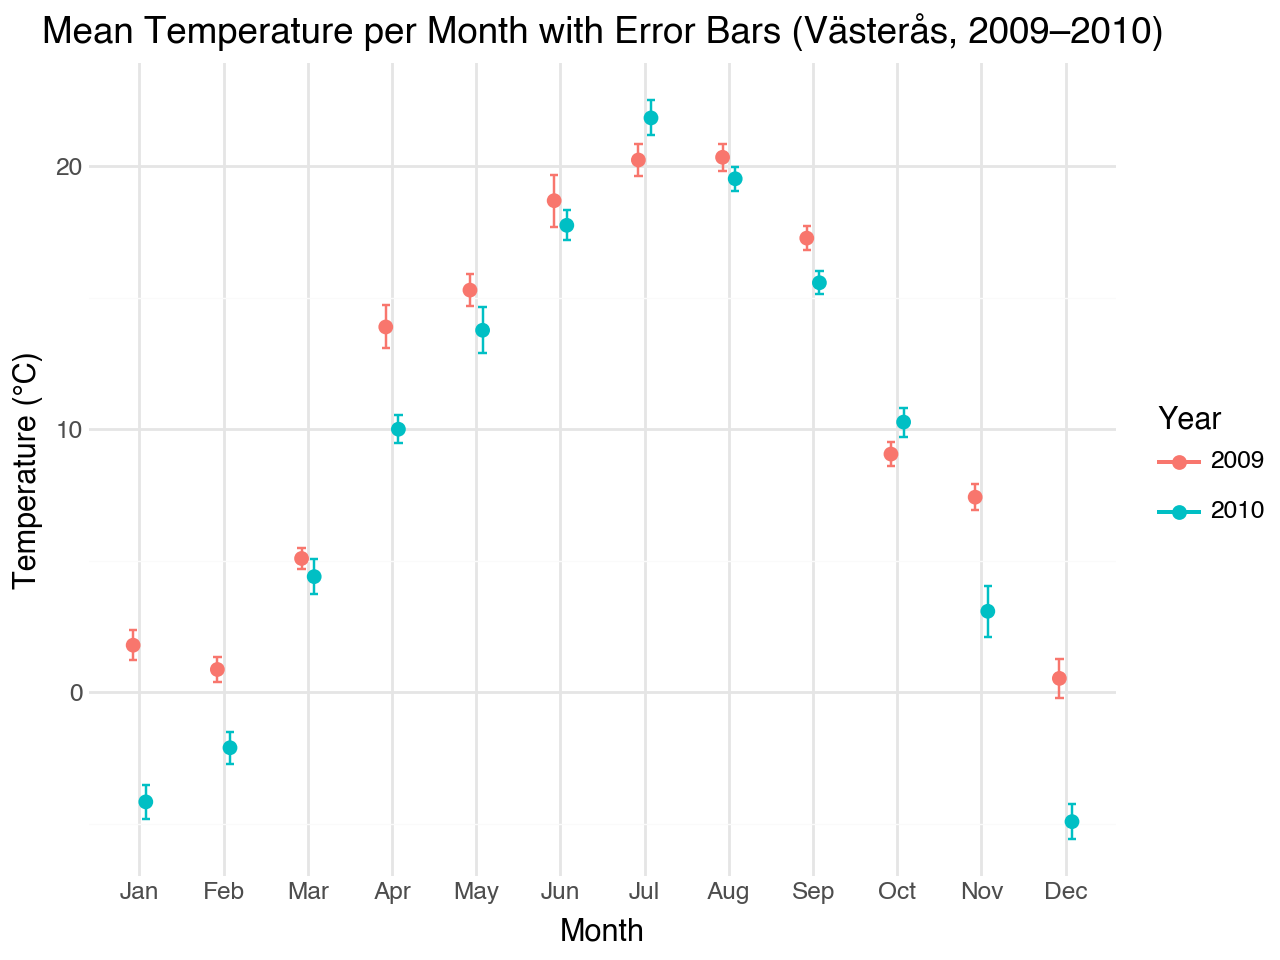

In [75]:
# Insert code here using standard error
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
tidy_weather["month"] = pd.Categorical(
    tidy_weather["month"],
    categories=month_order,
    ordered=True
) 
# Not sure if the question asks for tidy_weather or filtered_weather...
# Not sure if the question asks for standard deviation or standard error either... 
# ... assuming tidy_weather 
# ... assuming standard error (because it asks for it in the motivation below) 
# ... and assuming all 12 months (since fig 9.8 has 12 months).

summary = (
    tidy_weather 
    .groupby(["month", "Year"], as_index=False)
    .agg(
        mean_temp=("Temperature", "mean"),
        sd_temp=("Temperature", "std"),
        n=("Temperature", "count")
    )
)
summary["se_temp"] = summary["sd_temp"] / summary["n"]**0.5

(
ggplot(summary, aes(x="month", y="mean_temp", color="Year"))
+ geom_point(position=position_dodge(width=0.3), size=2)
+ geom_errorbar(
    aes(ymin="mean_temp - se_temp", ymax="mean_temp + se_temp"),
    position=position_dodge(width=0.3),
    width=0.2)
+ labs(
    title="Mean Temperature per Month with Error Bars (Västerås, 2009–2010)",
    x="Month",
    y="Temperature (°C)")
+ theme_minimal()
)
# Remember to print the visual 

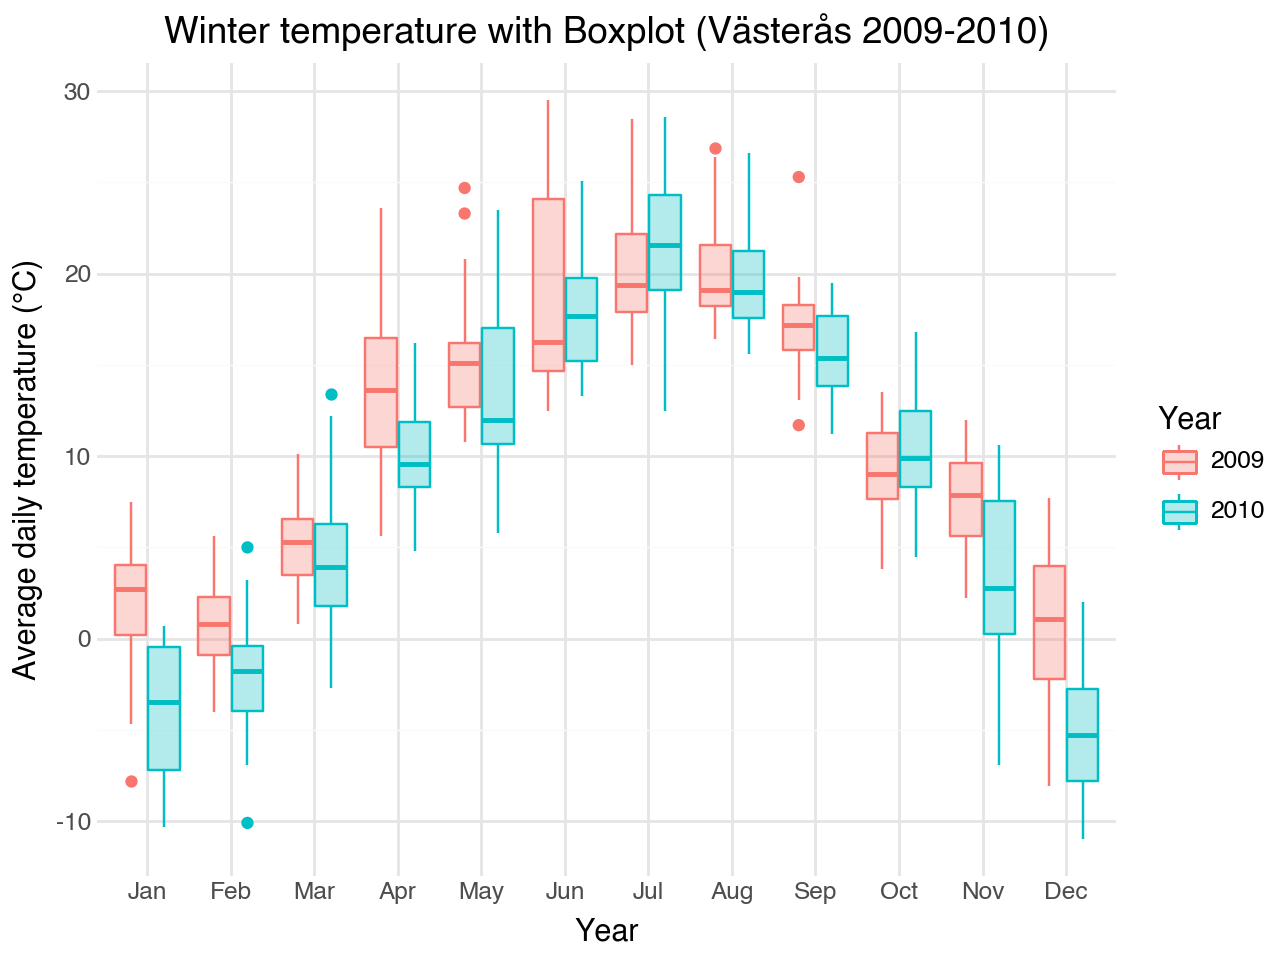

In [76]:
# Insert code here using boxplots
(
ggplot(tidy_weather, aes(x="month", y="Temperature", color="Year", fill="Year"))
+ geom_boxplot(position=position_dodge(width=0.8), alpha=0.3)
+ labs(y = "Average daily temperature (°C)", x = "Year", title="Winter temperature with Boxplot (Västerås 2009-2010)")
+ theme_minimal()
)
# Remember to print the visual 

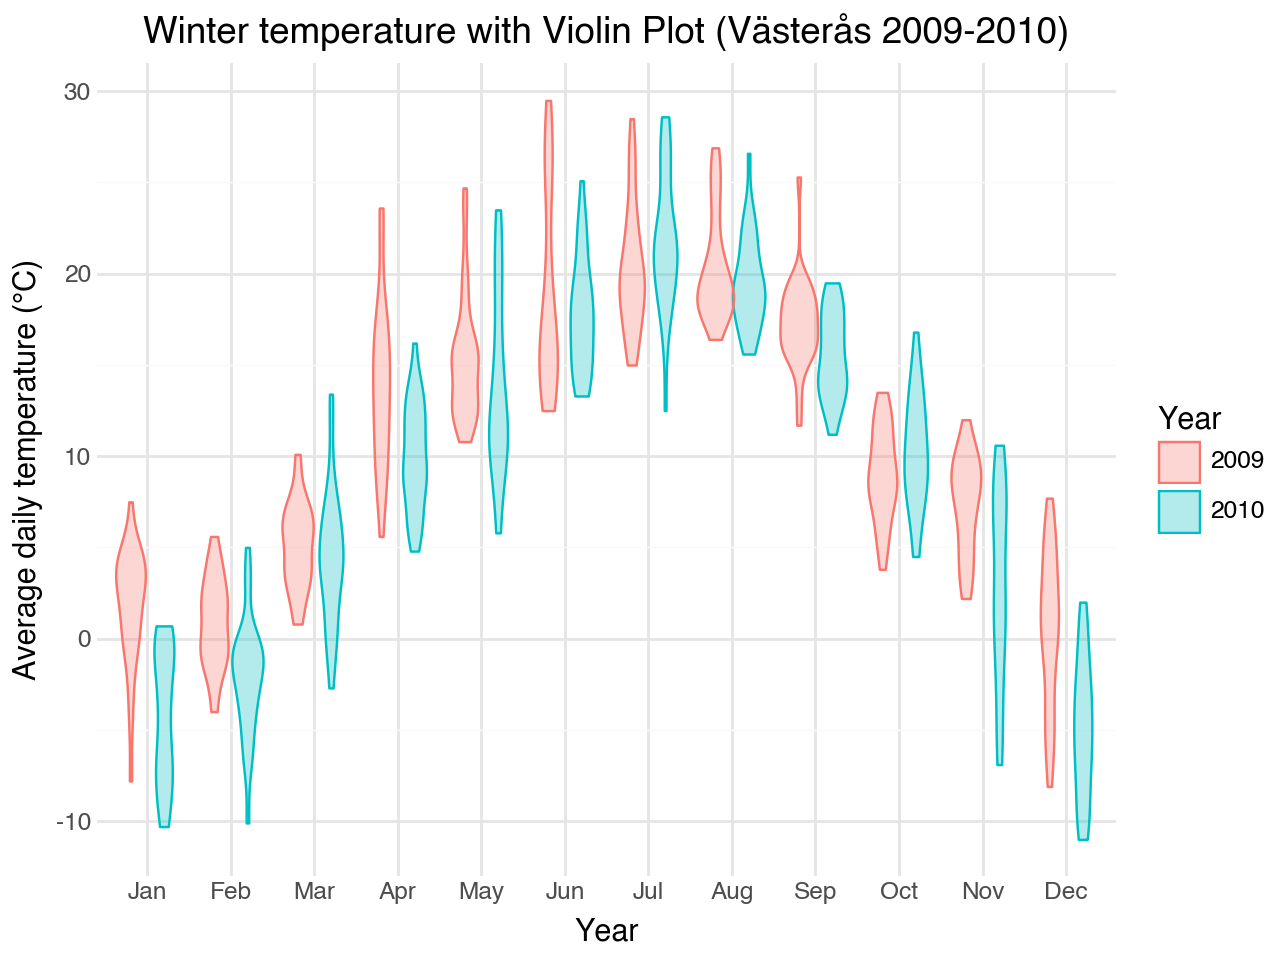

In [77]:
# Insert code here using violin plot with dots
(
ggplot(tidy_weather, aes(x="month", y="Temperature", color="Year", fill="Year"))
+ geom_violin(position=position_dodge(width=0.8), alpha=0.3)
+ labs(y = "Average daily temperature (°C)", x = "Year", title="Winter temperature with Violin Plot (Västerås 2009-2010)")
+ theme_minimal()
)
# Remember to print the visual 

**Briefly discuss the drawback with each approach (standard errors, boxplots, and violin plots).**

**Standard Errors**

This approach does not effectively visualize the spread of the data. Moreover, there is no standard for what the dot and bars mean, and unless a legend is provided, is left up to the reader

**Boxplots**

Again, this does not effectively visualize the spread of the data; for example, a bimodal and uniform distribution could look similar

**Violin plots**

Though these do effectively visualize the spread of the data, it does not visualize the thoroughness/quantity of data. There could be very few data points in one set (making it less reliable), and very many in another, yet they would appear equally thorough

One of the drawbacks with a violin plot is that it can be hard to read summary statistics from it. Produce a violin plot visual here, where you have also drawn the median for each violin, as well as the data points. 

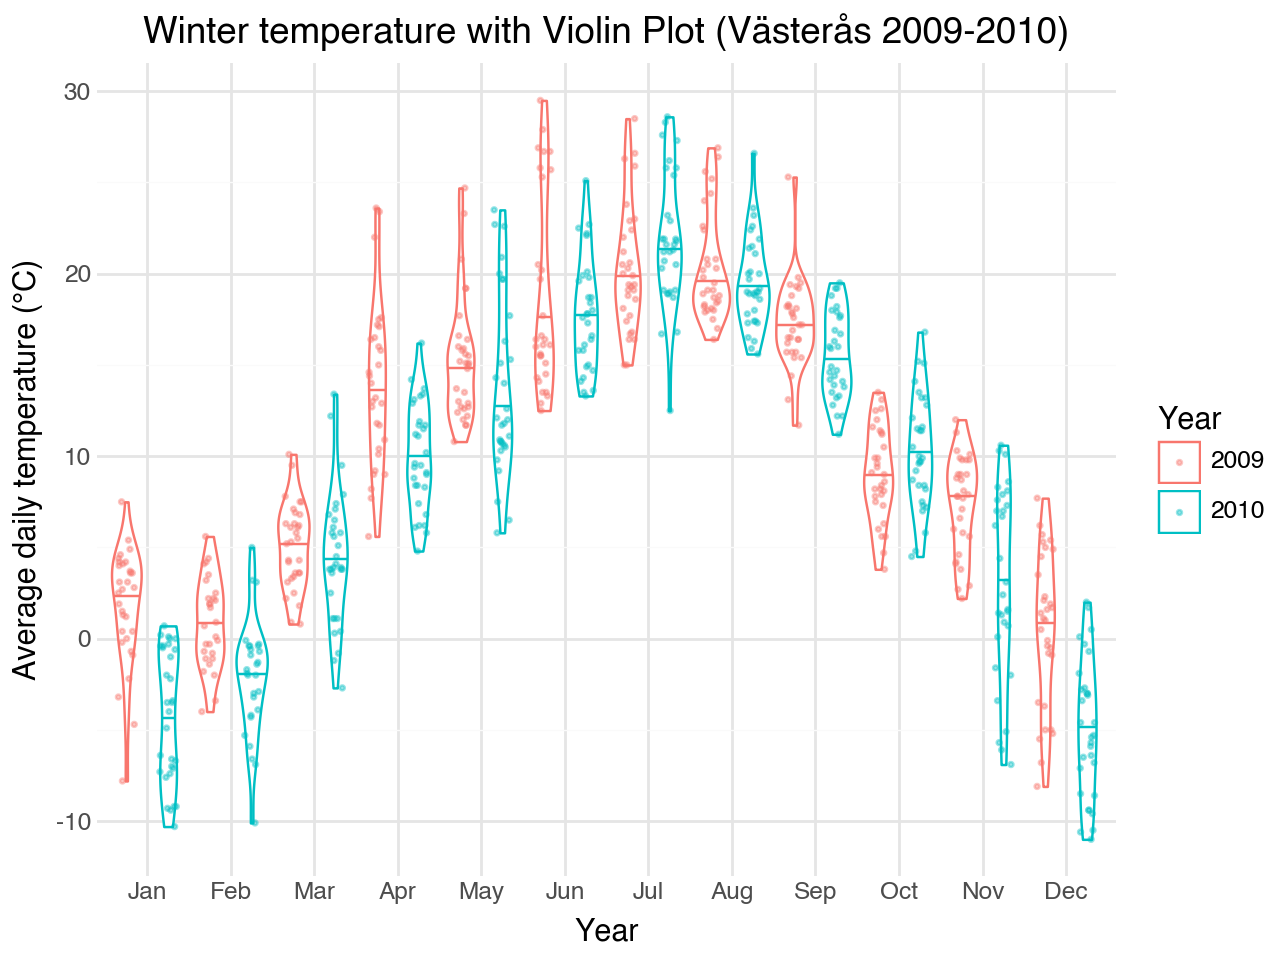

In [78]:
# Insert code here using violin plot with dots and median line
(
ggplot(tidy_weather, aes(x="month", y="Temperature", color="Year"))
+ geom_violin(position=position_dodge(width=1), alpha=1, draw_quantiles=0.5)
+ geom_jitter(position = position_jitterdodge(jitter_width = 0.2, dodge_width = 1), size = 0.5, alpha = 0.4)
+ labs(y = "Average daily temperature (°C)", x = "Year", title="Winter temperature with Violin Plot (Västerås 2009-2010)")
+ theme_minimal()
)
# Remember to print the visual 

**Briefly discuss how you could make it easy for the reader to understand that the line the visual represent the median.**

One could provide a legend on the right of the graph with an example violin shape, with labels at each significant point (e.g. max at the top, min at the bottom, median at the line in the middle)

### Question 3.3

Some people argue that visuals should be as minimal as possible. On the webpage you have a bad example of a minimalist way to plot the min, median, and max temperature of each month in 2009 and 2010 using the dataset in Question 3.2 (where you hopefully have filtered out daily temperatures for 2009 and 2010). By **only** using geom\_point recreate the visual (you do not need to recreate the title). **You are not allowed to transform the dataset**.

*Hint - Remember the stat argument in ggplot*

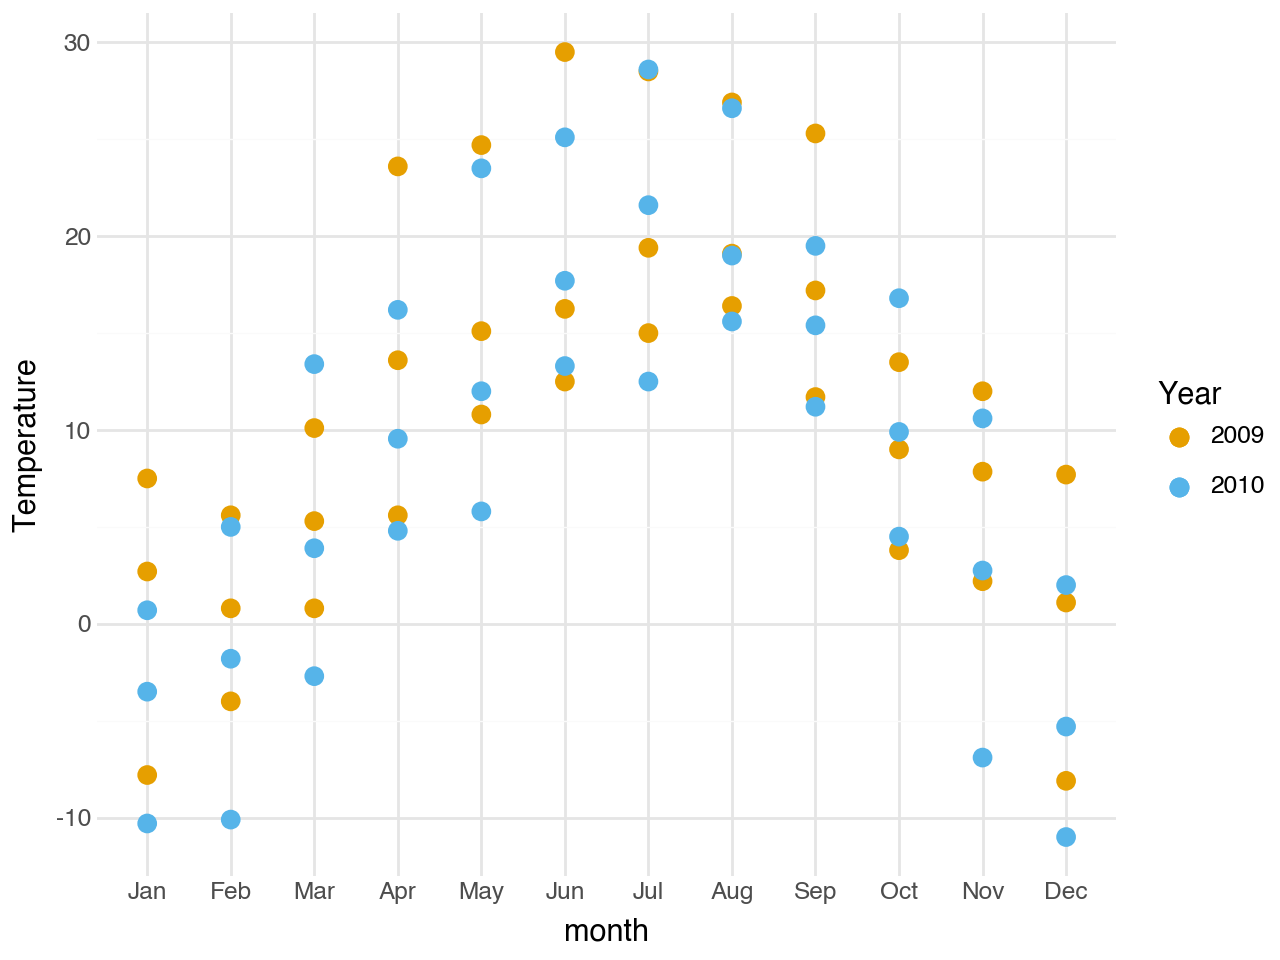

In [99]:
# Insert code here 
(
ggplot(tidy_weather, aes(x="month", y="Temperature", color="Year"))
+ geom_point(stat="summary", fun_y=np.min, size=3)
+ geom_point(stat="summary", fun_y=np.median, size=3)
+ geom_point(stat="summary", fun_y=np.max, size=3)
+ scale_color_manual(values=[cbPalette[0], cbPalette[1]])
+ theme_minimal()
)
# Remember to print the visual 

**Motivate how you can improve the plot.**

* First of all, the points for the two years overlap, so adding position dodge would help with readability.

* Adding some way to differentiate min, max and median from each other, like using different shapes, would reduce cognitive load (right now it can be quite confusing knowing exactly what point represents what)

* Adding a legend explaining the shapes from the motivation above would also reduce confusion.

* Adding a title would help explain what the whole visual is trying to convey

* Maybe adding small point-ranges would be better than the aforementioned shapes motivation, making it look something like error-bars would still be minimalistic but more intuitive, as min/max/median points right now don't seem like they are related.

### Question 3.4

Using the full weather dataset on the webpage create two plots of your on choice. For example, you can compare winter temperatures across years, differences in night and day temperatures etc. For each visual provide a brief motivation on why your choice of visual (e.g violin or boxplot) is a good choice.

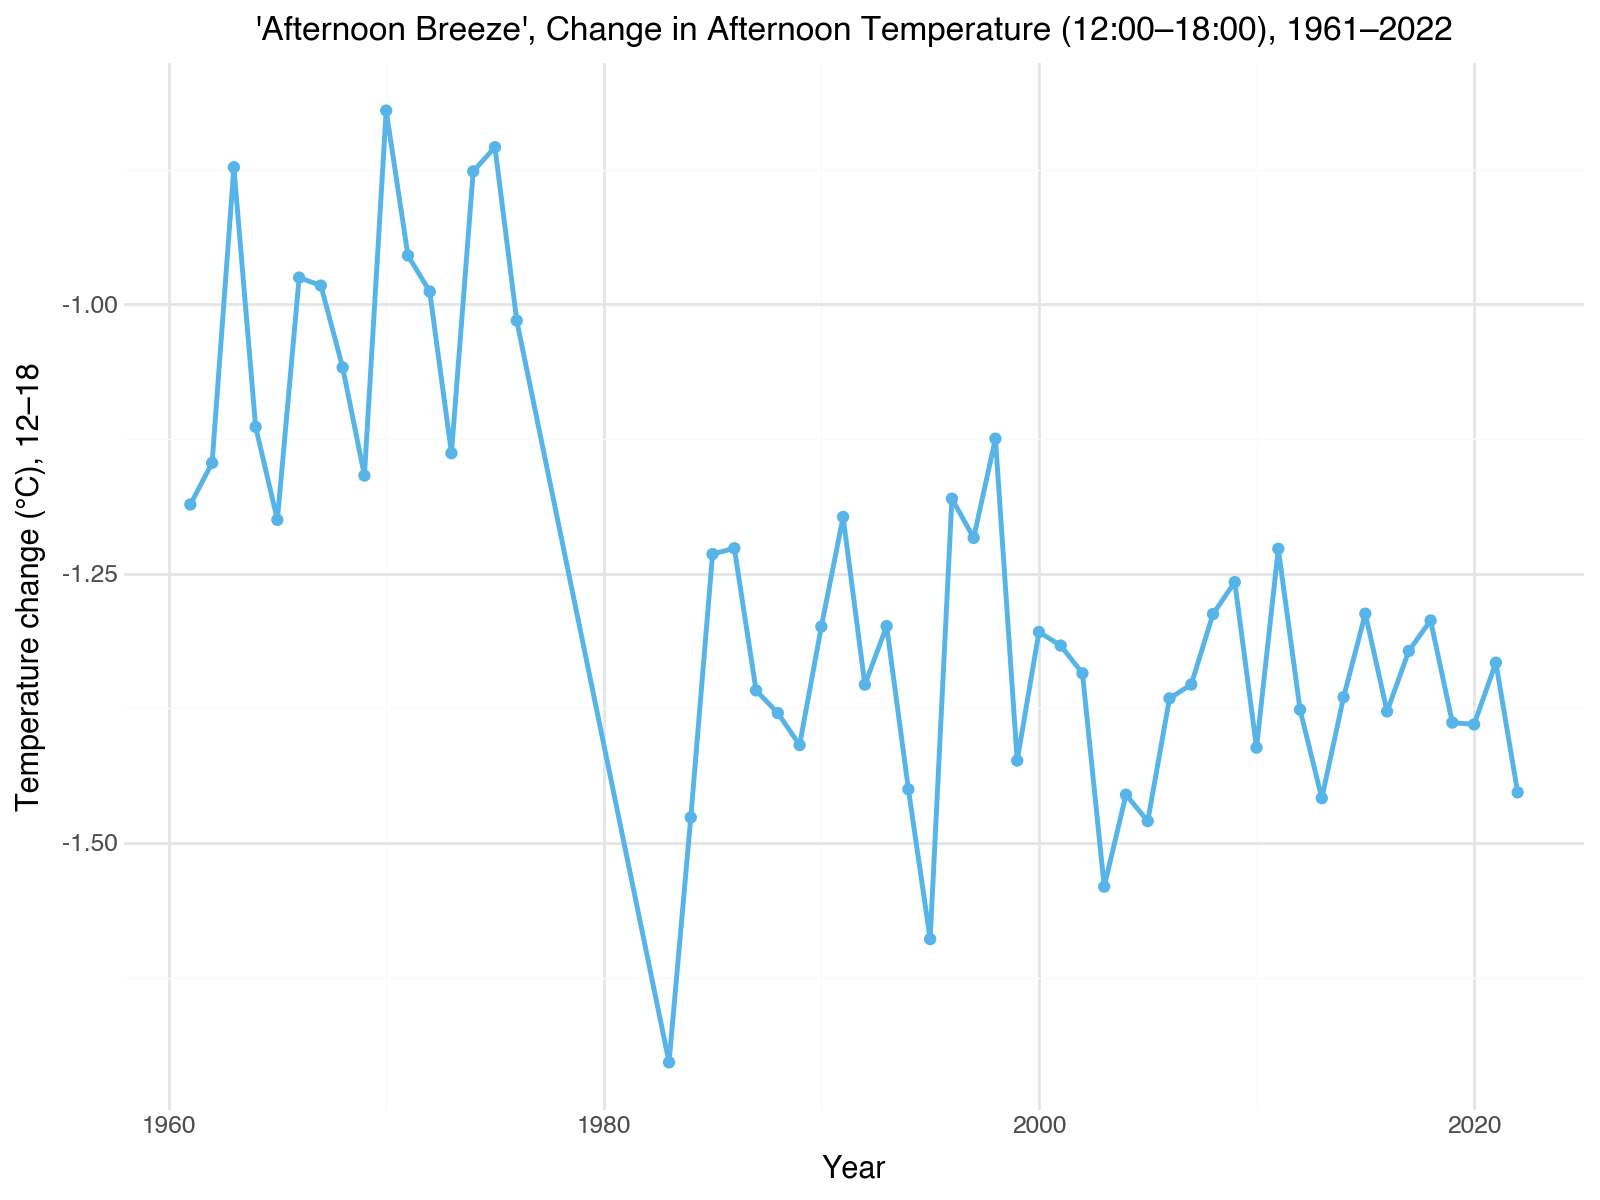

In [137]:
# Insert code here 
weather_full = pd.read_csv("Homework1_resources/Weather_tidy_full.csv")
afternoons = weather_full[weather_full["hour_of_day"].isin([12,18])]
pivoted = (
    afternoons
    .pivot_table(index=["year", "month", "day"], 
                 columns="hour_of_day", 
                 values="Temperature")
    .reset_index()
)
pivoted["afternoon_breeze"] = pivoted[18] - pivoted[12]
yearly = pivoted.groupby("year", as_index=False)["afternoon_breeze"].mean()

p1 = (
ggplot(yearly, aes("year", "afternoon_breeze"))
+ geom_line(size=1, color=cbPalette[1])
+ geom_point(color=cbPalette[1])
+ theme(plot_title=element_text(size=2))
+ labs(
    x="Year",
    y="Temperature change (°C), 12–18",
    title="'Afternoon Breeze', Change in Afternoon Temperature (12:00–18:00), 1961–2022"
)
+ theme_minimal()
+ theme(plot_title=element_text(size=12), figure_size=(8, 6))
)
p1
# Remember to print the visual 

Line plot naturally shows temporal trends over years continuously, continuous measurement of temperature change suits a continuous time series. Tried keeping it as minimalistic as possible, yearly aggregation reduces daily noise while preserving long-term patterns. We could have chosen to solely plot a line without points, but that would not be truthful... note that there is a data gap between years 1976 and 1983, which would not have been clear without plotting the data points.

The thought is that we want to show climate-scale trends with this plot, how the phrase "afternoon breeze" might have changed throughout the years, and the plot directly addresses this question, AKA "How has the afternoon temperature change pattern evolved over decades?" rather than just showing raw temperatures. We could have maybe used geom_smooth() to emphasize the overall trend, but felt like it was not needed as the data is already "compressed" as it is, since we categorized individual daily values into yearly means.

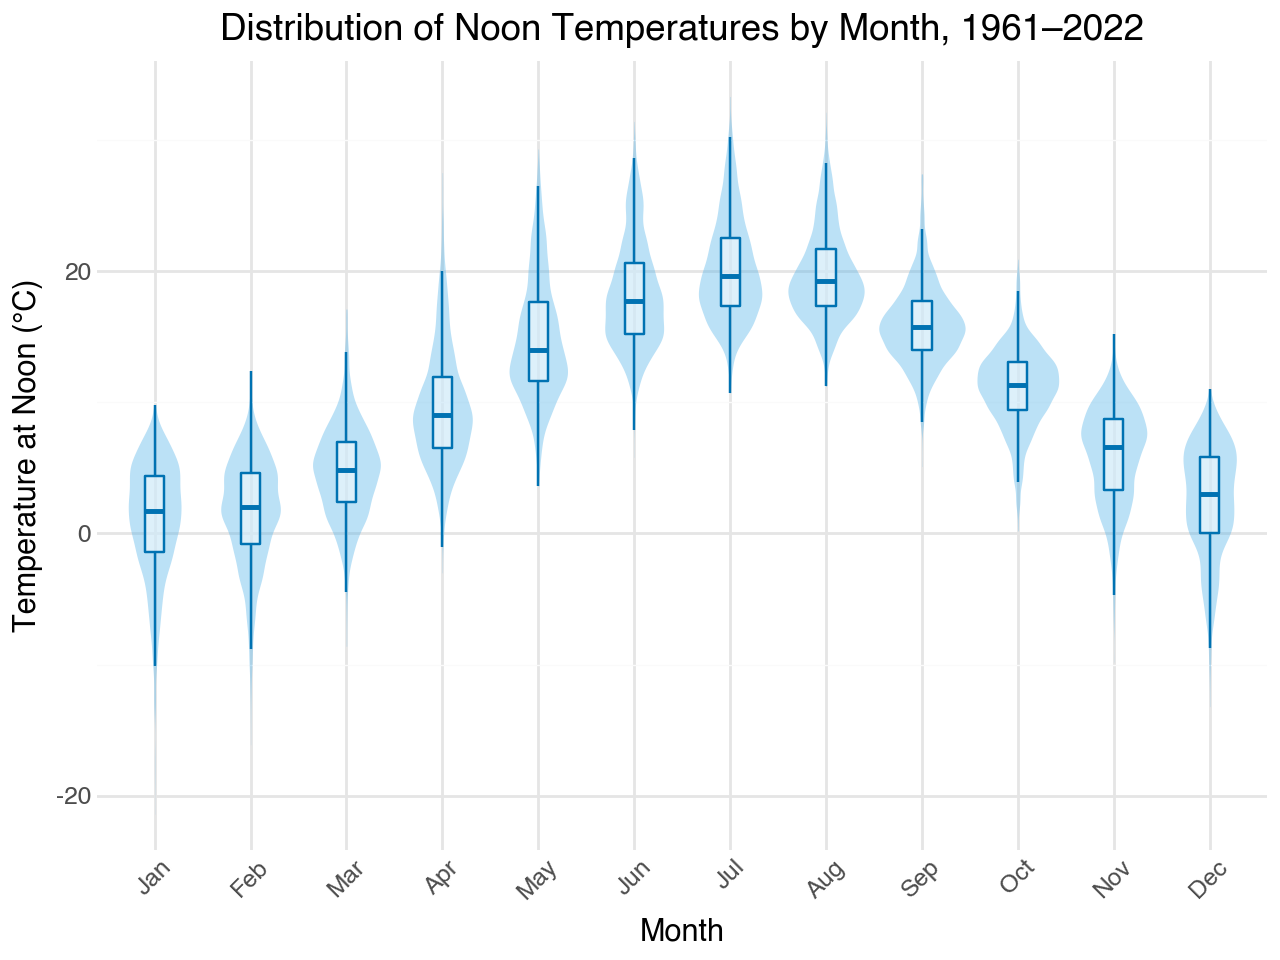

In [174]:
# Insert code here 
monthly_violin = (
    weather_full[weather_full["hour_of_day"] == 12]
    .assign(month=pd.Categorical(weather_full[weather_full["hour_of_day"] == 12]['month'], 
            categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
)

p2 = (
    ggplot(monthly_violin, aes(x="month", y="Temperature"))
    + geom_violin(fill=cbPalette[1], alpha=0.4, trim=True, color=None)
    + geom_boxplot(color=cbPalette[4], width=0.2, alpha=0.5, outlier_alpha=0)
    + labs(
        x="Month",
        y="Temperature at Noon (°C)",
        title="Distribution of Noon Temperatures by Month, 1961–2022"
    )
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45))
)
p2
# Remember to print the visual 

We used a combo of violin plot and boxplot to show both shape and statistical summary. The violin plots show the full distribution shape while the boxplots provide precise quartiles and median. We first used violin + boxplot + automatic outlier points that come with boxplot, but quickly noticed that there was some redudancy in plotting the outliers as the violins already show the full distribution (including extremes!) So to reduce noise, we took away the outlier points. 

To make the visuals easy on the eyes we opted for low contrast between the violins and boxplots: Stark darker outlines on the boxplots (Darker blue though, not entirely black, as we want to have a visually appealing color cohesion) and violins with lighter hue fill and no thick outlines. The thought behind this is that the violins should be there to support/complement the boxplots, not visually compete with them!

## Amounts 

For this part reading Chapter 6 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 4.1 

Barplots are the workhorse for plotting amounts. Create a dataframe with the values from Tab. 6.1 in the [course book](https://clauswilke.com/dataviz/visualizing-amounts.html), and recreate Fig. 6.1 and Fig. 6.3 in the course book.

In [82]:
# Insert code here for Fig. 6.1
# Remember to print the visual 

In [83]:
# Insert code here for Fig. 6.2
# Remember to print the visual 

### Question 4.2 

Often we want to highlight a specific column in a barplot. Using the same layout as in the most recent plot highlight the column of Jumanji in orange, and keep the remaining columns grey.

In [84]:
# Insert code here 
# Remember to print the visual 

Besides using colours to highlight, adding numbers for the highlighted category can also help. For the Jumanji column also add the number that the bar corresponds to.

In [85]:
# Insert code here 
# Remember to print the visual 

### Question 4.3

On the webpage, I have uploaded a dataset on the number of marriages in Stockholm, Gothenburg, Malmo and rest of Sweden for 2020, 2015, 2010 and 2005. Using this dataset, produce i) a visual where it is easy to see which year Stockholm had the second most marriages, and ii) a visual where it is easy to see how many more marriages there was in Stockholm compared to Gothenburg in 2015. **In each visual, I want you to include the number of marriages for each city and year**. 

In [86]:
# Insert code here for part i)
# Remember to print the visual 

In [87]:
# Insert code here for part ii)
# Remember to print the visual 

Motivate how you made the two mentioned cases above clear in your plots.

_Your answer here_

### Question 4.4

When plotting the mobile operating system data in the lectures, I used a classical barplot. Another way which makes it easy to track the trend over several years or across companies is a common line-plot. Using the dataset on the webpage recreate the present on the webpage.

In [88]:
# Insert code here 
# Remember to print the visual 

By default plotnine places the legend for a visual to the right, or bottom depending on a theme. Do you think having a legend next to the visual is the best solution?

__Write answer here__

### Question 4.5

In the lecture, I provided data on European nations median lifespan. Now using the full dataset provided on the webpage, select a subset of countries and visualise i) life-expectancy across a timespan of your choice and ii) life expectancy in 2020. Provide a brief motivation for your choice of visual - and why your choice is readable.



In [89]:
# Insert code here for part1 
# Remember to print the visual 

*Brief motivation*

In [90]:
# Insert code here for part2 
# Remember to print the visual 

*Brief motivation*